# 数据处理流程

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [8]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## 预处理

### 查看缺失值

In [4]:
import pandas as pd
df = iris

#检查null
pd.isnull(df).sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 处理缺失值

### 做成dataset

### NLP的预处理

## Single Feature Analysis 单因子分析

In [142]:
import pandas as pd
import scipy
import numpy as np
df_hr = pd.read_csv('HR.csv')
df_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     15000 non-null  float64
 1   last_evaluation        15002 non-null  float64
 2   number_project         15002 non-null  int64  
 3   average_monthly_hours  15002 non-null  int64  
 4   time_spend_company     15002 non-null  int64  
 5   Work_accident          15002 non-null  int64  
 6   left                   15002 non-null  int64  
 7   promotion_last_5years  15002 non-null  int64  
 8   department             15002 non-null  object 
 9   salary                 15002 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [127]:
df_hr.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [201]:
df_hr.describe().head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,15000.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000,15002.000000
mean,0.612839,67.373732,3.802693,201.041728,3.498067,0.144581,0.238235,0.021264
std,0.248623,8164.407524,1.232733,49.941815,1.460053,0.351689,0.426018,0.144267


### Quantile, mode, median

In [153]:
df_hr.quantile([i/5 for i in range(6)]).head(3)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0.0,0.09,0.36,2.0,96.0,2.0,0.0,0.0,0.0
0.2,0.40,0.54,3.0,150.0,2.0,0.0,0.0,0.0
0.4,0.57,0.65,3.0,181.0,3.0,0.0,0.0,0.0


In [103]:
#when it's not unique, the number of rows = the maximal number of modes
df_hr.mode()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### 偏态系数，峰态系数
偏度(Skew) = 3次矩. skew<0 说明大多数值>平均值

峰度(Kurtos) = 4次矩. 正态分布峰态系数=3

In [124]:
df_hr.skew().head(2), df_hr.kurt().head(2)

(satisfaction_level     -0.476438
 last_evaluation       122.482652
 dtype: float64,
 satisfaction_level       -0.670696
 last_evaluation       15001.999987
 dtype: float64)

### Sample

In [126]:
df_hr.sample(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
3729,0.90,0.66,3,261,3,1,0,0,product_mng,medium
14542,0.11,0.85,7,302,4,0,1,0,sales,low


### 异常值分析，处理

In [128]:
quantile = df_hr.quantile([0.25, 0.75])
quantile

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0.25,0.44,0.56,3.0,156.0,3.0,0.0,0.0,0.0
0.75,0.82,0.87,5.0,245.0,4.0,0.0,0.0,0.0


In [143]:
for col in ['satisfaction_level','last_evaluation','average_monthly_hours']:
    df_hr = df_hr[(df_hr[col]<quantile[col].iloc[1]+3*(quantile[col].iloc[1]-quantile[col].iloc[0])) & 
                  (df_hr[col]>quantile[col].iloc[0]-3*(quantile[col].iloc[1]-quantile[col].iloc[0]))]

## multi-features analysis

## 可视化

#### 柱状图

In [ ]:
import seaborn as sns
%matplotlib inline

#柱状图
df = ...
sns.barplot(x = 'Sex', y = 'Survived', data=train)

#自定义柱状图
labels = ['unkonwn', 'Baby', 'Child', 'Teenager', 'Young adult', 'Adult', 'Senior']
bins = [-1, 0, 5, 12, 18, 24, 25, 60, np.inf]
train['AgeGroup'] = pd.cut(train['Age'], bins, labels = labels)
sns.barplot(x = 'AgeGroup', y = 'Survived', data=train)

### subplot

### 字段编码成数字
1. 一般来说取值<10可以one hot

#### One Hot via pandas


In [2]:
pd.get_dummies(df, columns = ['education'])

#### LabelEncoder
1.按照字段的顺序（也许是字典序）

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['xxx'] = le.fit_transform(df['country'])  #可以按fit，transform分开
df.head(10)

#### pd.factorize
1. 按照出现的次数

In [ ]:
df['country_LabelEncoder'] = pd.factorize(df['country'])[0]

#### BinartEncoder

In [ ]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols = ['country'])

pd.concat([df, encoder.fit(transform(df['country']).iloc[:,1:])], axis = 1)

#### Counting Encoding

In [ ]:
df['country_count'] = df['country'].map(df['country'].value_counts())

#### Target encoding
使用标签（target）进行编码，比如取某个country（china）对应的target的mean

In [ ]:
df['country_target'] = df['country'].map(df.groupby(['country'])['target'].mean())
df.head()

### 数值类别的特征工程

#### 取整（round）

In [ ]:
df['age_rount1'] = df['age'].round()
df['age_rount2'] = (df['age']/10).astype(int)

### 日期
1. 手动特征提取，比如年/月/日/星期几，是否高峰时段
2. 根据上述特征进行标签编码，比如在星期几固定时的中位数，平均数

 ## 特征筛选

### 特征降维

#### PCA

In [200]:
from sklearn.decomposition import PCA
df_hr = pd.read_csv('HR.csv')
pca = PCA(n_components=3)
# pca.fit_transform(df_hr)
df_hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department', 'salary'],
      dtype=object)

#### LDA (linear discriminant analysis)
以二分类为例，希望对features space做一个线性变换，使得:
1. 同一标注内的std尽可能小
2. 不同标注内的距离尽可能大
i.e. 对于一般的LDA是想要maximize $\frac{|mean1-mean2|^2}{std_1^2 + std_2^2}$
3. 在特征降维中，假设降维矩阵为 $\omega_0$, 分成的两个集合为 $X_1,X_2$, 那么实际上是需要计算一些矩阵


In [155]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X=np.array([[-1,-1],[-2,-1],[-3,-2],[1,1],[2,1],[3,2]])
Y = np.array([1,1,1,2,2,2])

In [161]:
#可以作为分类器使用，实际上就是linear discriminant analysis
clf = LinearDiscriminantAnalysis(n_components=1).fit(X,Y)
clf.predict([[0.8,1.0]])

array([2])

In [156]:
LinearDiscriminantAnalysis(n_components=1).fit_transform(X,Y)

array([[-1.73205081],
       [-1.73205081],
       [-3.46410162],
       [ 1.73205081],
       [ 1.73205081],
       [ 3.46410162]])

### 基于统计值的特征筛选
1.字段方差（方差大的比较好...但是这个可以scale）

2.缺失值比例

3.分布一致性（在训练集/验证集中分布不一致）

4.离群点

5.标签相关性


#### 方差

In [16]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import load_boston
X = [[0,0,1],[0,1,0],[1,0,0],[0,1,1],[0,1,0],[0,1,1]]
sel = VarianceThreshold(threshold=.8*(1-.8))
sel.fit_transform(X)


data = load_boston()
sel.fit_transform(data.data)
print(data.feature_names[~sel.get_support()])
print(data.feature_names)

['CHAS' 'NOX']
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### 基于模型的筛选

#### 基于树模型的基尼指数
1.根据字段在节点分裂的信息增益或者基尼指数
2.根据字段被分裂的次数，字段分裂平均深度

[0.03509644 0.00107264 0.00538695 0.00077721 0.02224523 0.43372665
 0.01427714 0.07274482 0.00370644 0.01452394 0.01654546 0.01210584
 0.36779126]


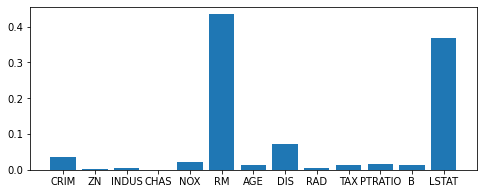

In [146]:
from sklearn.ensemble import RandomForestRegressor 
from matplotlib import pyplot as plt
data = load_boston()

rf = RandomForestRegressor()
rf.fit(data.data, data.target)
print(rf.feature_importances_)

plt.figure(figsize=(8,3))
plt.bar(range(1,14), rf.feature_importances_)
_ = plt.xticks(range(1,14), data.feature_names)

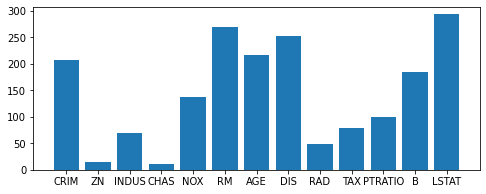

In [145]:
import numpy as np
from lightgbm import LGBMRegressor

clf = LGBMRegressor()
clf.fit(data.data, data.target)

plt.figure(figsize=(8,3))
plt.bar(range(1,14), clf.feature_importances_)
_ = plt.xticks(range(1,14), data.feature_names)

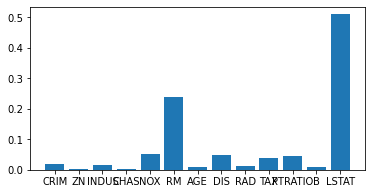

In [14]:
import numpy as np
from xgboost import XGBRegressor

clf = XGBRegressor()
clf.fit(data.data, data.target)

plt.figure(figsize=(6,3))
plt.bar(range(1,14), clf.feature_importances_)
_ = plt.xticks(range(1,14), data.feature_names)

 #### 打散
 1.根据字段打散后对模型影响效果

In [148]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.inspection import permutation_importance
from sklearn.datasets import load_boston
data = load_boston()
clf = RandomForestRegressor().fit(data.data, data.target)
result = permutation_importance(clf, data.data, data.target, n_repeats=10, random_state=0)

In [149]:
result.importances_mean

array([3.97043736e-02, 5.88603470e-04, 4.77340907e-03, 5.38821128e-04,
       4.30916861e-02, 5.29722744e-01, 1.47302451e-02, 1.22226397e-01,
       3.20147870e-03, 2.00852427e-02, 2.60135450e-02, 1.04812501e-02,
       5.51719123e-01])

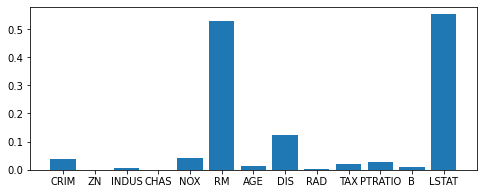

In [150]:
plt.figure(figsize=(8,3))
plt.bar(range(data.data.shape[1]), result.importances_mean)
_ = plt.xticks(range(data.data.shape[1]), data.feature_names)

# Numpy Basic

### Random sampling

# Pandas Basic

In [213]:
import seaborn as sns
import pandas as pd
import numpy as np
iris = sns.load_dataset('iris')
df=iris
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [198]:
df.describe().head(2)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000,150.000000
mean,5.843333,3.057333,3.758,1.199333


In [5]:
df['species'].value_counts(), df['sepal_length'].value_counts().head(2)

(setosa        50
 versicolor    50
 virginica     50
 Name: species, dtype: int64,
 5.0    10
 5.1     9
 Name: sepal_length, dtype: int64)

### Set Options

In [17]:
pd.set_option('display.max_columns', 85)
pd.set_option('display.max_rows', 85)

### Select Columns and Rows
1.iloc vs loc
iloc = (integer)loc, i.e. using integer to slice.

In [203]:
## Use [] to select columns

sepal_width = df['sepal_width'] ## return a series
sepal_width_df = df[['sepal_width']] ## return a dataframe

## Use .loc to select columns or rows, .loc[rows indexes, columns indexes (names)]
sepal_width_df = df.loc[:,['sepal_width','sepal_length']] 
## return a series if one columsn, return a dataframe if multi columsn

## directly access columns by attribute, but can only access existing columns
df.sepal_length
## to create new columns, use ['new_column_name']
df['new_columns'] = list(range(len(df.index)))
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species,new_columns
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,2


In [204]:
############################# selection by index: more on .loc[]
## Slice rows by index, not specifying columns
df.loc[:5]
## Slice rows by every other xx
df.loc[::4]
## Reverse the dataframe, last row becomes the first row
df.loc[::-1]
## Assign values using .loc[]
df.loc[0:5] = 0

## Select rows with boolean array
df.loc[df['sepal_length']>5]
#### specify columns
df.loc[df['sepal_length']>5, 'petal_length'].head()

10    1.5
14    1.2
15    1.5
16    1.3
17    1.4
Name: petal_length, dtype: float64

In [205]:
## Select both rows and columns
df.iloc[1:5, 2:4]
## Select discrete rows and columns
df.iloc[[1,4,5],[2,3]]

,petal_length,petal_width
1,0.0,0.0
4,0.0,0.0
5,0.0,0.0


In [207]:
############################# selection by callable
## Specify rows
df.loc[lambda df: df['sepal_length'] > 5, :] ## It's the same as df.loc[df['sepal_length'] > 5, :]
## Specify columns

df.loc[:, lambda df: ['A', 'B']]
## Directly use []
df[lambda df: df.columns[0]]

## Indexing in series
df['sepal_length'].loc[lambda s: s > 0].head()


### value_counts

In [41]:
df['species'].value_counts(normalize=True),df['species'].value_counts()

(setosa        0.333333
 versicolor    0.333333
 virginica     0.333333
 Name: species, dtype: float64,
 setosa        50
 versicolor    50
 virginica     50
 Name: species, dtype: int64)

### Drop

In [9]:
df.drop(['sepal_length'], axis=1).head(2)

,sepal_width,petal_length,petal_width,species
0,3.5,1.4,0.2,setosa
1,3.0,1.4,0.2,setosa


### Groupby


In [11]:
what_is_group = df.groupby(['species'])
what_is_group.get_group('setosa').head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [12]:
df.groupby(['species'],as_index=False).mean()

,species,sepal_length,sepal_width,petal_length,petal_width
0,setosa,5.006,3.428,1.462,0.246
1,versicolor,5.936,2.770,4.260,1.326
2,virginica,6.588,2.974,5.552,2.026


In [38]:
what_is_group[['petal_width', 'sepal_width']].mean()

,petal_width,sepal_width
species,,
setosa,0.246,3.428
versicolor,1.326,2.770
virginica,2.026,2.974


### Filter

In [14]:
filt = df['species'] == 'setosa'
filt.head(2)

0    True
1    True
Name: species, dtype: bool

### Aggregate

In [ ]:
#### basic function
##   dataframe.aggregate(func=None, axis=0, *args, **kwargs)

In [211]:
## apply the same aggregate function over rows to all the columns
print('first one \n', df.agg(['sum','min']))

## apply different aggregation function per column
print('second one \n', df.agg({"sepal_length":['sum','min'], "petal_length":['min','max']}))

## apply aggregation function and remane indexes of the results
print('third one \n', df.agg(summation = ("sepal_length",sum), mean = ("petal_length",np.mean)))

## aggregate over columns
print('fourth one \n', df.agg("count", axis = "columns").head())

first one 
      sepal_length  sepal_width  petal_length  petal_width  new_columns
sum         846.8        438.3         555.0        178.5        11160
min           0.0          0.0           0.0          0.0            0
second one 
      sepal_length  petal_length
sum         846.8           NaN
min           0.0           0.0
max           NaN           6.9
third one 
            sepal_length  petal_length
summation         846.8           NaN
mean                NaN           3.7
fourth one 
 0    6
1    6
2    6
3    6
4    6
dtype: int64


### Apply

In [ ]:
## use a universal function
df[['sepal_length','sepal_width','petal_length','petal_width']].apply(np.sqrt).head()

## specify axis
df[['sepal_length','sepal_width','petal_length','petal_width']].apply(np.sum, axis=0).head()
df[['sepal_length','sepal_width','petal_length','petal_width']].apply(np.sum, axis=1).head()

## return list-like
df[['sepal_length','sepal_width','petal_length','petal_width']].apply(lambda x: [np.min(x),np.max(x)], axis=1).head()


# use result_type="expand" to expand list-like reesults to columns of a data
df[['sepal_length','sepal_width','petal_length','petal_width']].apply(lambda x: [np.min(x),np.max(x)], axis=1, result_type="expand").head()

## similar to result_type='expand', directly pass a series
df[['sepal_length','sepal_width','petal_length','petal_width']].apply(lambda x: pd.Series([np.min(x),np.max(x)], index=['minimum','maximum']), axis=1).head()

#### use result_type = "broadcast" to return the same shape
##   df[['sepal_length','sepal_width','petal_length','petal_width']].apply(lambda x: [np.min(x),np.max(x)], axis=1, result_type="broadcast").head()


### Assign
1. assign can take more than one columns to create another column

### Rolling
1. basic function
    DataFrame.rolling(window, min_periods=None, center=False, win_type=None, 
    on=None, axis=0, closed=None, method='single')

In [220]:
## rolling sum with a window length of 2, using "triang" window type
print("first one\n", df.rolling(2, win_type = "triang").sum().head(2))

## rolling sum with a window length of 2, using "gaussian" window type
print("second one \n", df.rolling(2, win_type = "gaussian").sum(std=3).head(3))

## rolling sum with a window length of 2
print("third one \n", df.rolling(2).sum().head(3))
## rolling with a window length of2, set min_periods
print('fourth one', df.rolling(2, min_periods=1).sum().head(3))

first one
    sepal_length  sepal_width  petal_length  petal_width
0           NaN          NaN           NaN          NaN
1           5.0         3.25           1.4          0.2
second one 
    sepal_length  sepal_width  petal_length  petal_width
0           NaN          NaN           NaN          NaN
1      9.862071     6.410346      2.761380     0.394483
2      9.467588     6.114484      2.662759     0.394483
third one 
    sepal_length  sepal_width  petal_length  petal_width
0           NaN          NaN           NaN          NaN
1          10.0          6.5           2.8          0.4
2           9.6          6.2           2.7          0.4
fourth one    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1          10.0          6.5           2.8          0.4
2           9.6          6.2           2.7          0.4


In [ ]:
## with forward-looking windows

indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=2)

df.rolling(window=indexer, min_periods=1).sum().head()

In [ ]:
## If it's time series, we can roll by time interval
## Define a time series dataframe = ts
ts.rolling("2s").sum()

# Sklearn Basic

In [171]:
import seaborn as sns
import pandas as pd
iris = sns.load_dataset('iris')
df=iris
df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


### features selection 特征筛选

In [182]:
from sklearn.feature_selection import VarianceThreshold
VarianceThreshold(threshold=0.1).fit_transform(df.loc[ : ,['sepal_length','sepal_width']]).shape

(150, 2)

### Stratified K-fold in Model Selection
1. 利用 sklearn.model_selection 里的 StratifiedKFold,它的作用是根据Y的分布来进行筛选，使得每个fold里的分布尽可能一致。不知道对于连续型的怎么处理？

In [197]:
from sklearn.model_selection import StratifiedKFold
import numpy as np
features = df.columns.values[:-1]
target = df.columns.values[-1]
X = df.loc[:,features]
Y = df.loc[:, target]
# print(X.shape, Y.shape, Y[:5])
StratifiedKFold()
skf = StratifiedKFold(n_splits=3)
for train_index, test_index in skf.split(X, Y):
    print(train_index.shape, test_index.shape, pd.Series(Y[train_index]).value_counts())

(100,) (50,) virginica     34
setosa        33
versicolor    33
Name: species, dtype: int64
(100,) (50,) versicolor    34
setosa        33
virginica     33
Name: species, dtype: int64
(100,) (50,) setosa        34
versicolor    33
virginica     33
Name: species, dtype: int64


### Metrics
1. sklearn.metrics

### Labels Encoding

#### LabelEncoder
1.used to turn categorical data (e.g. strings) into integer labels

In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['species_encoded'] = le.fit_transform(df['species'])
df.tail(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded
148,6.2,3.4,5.4,2.3,virginica,2
149,5.9,3.0,5.1,1.8,virginica,2


#### factorize

In [75]:
df['species_factorize'] = pd.factorize(df['species'])[0]
df.tail(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded,species_factorize
148,6.2,3.4,5.4,2.3,virginica,2,2
149,5.9,3.0,5.1,1.8,virginica,2,2


#### Orginal Encoding

In [80]:
df['species'].value_counts(), df['species'].value_counts()['setosa']

(setosa        50
 versicolor    50
 virginica     50
 Name: species, dtype: int64,
 50)

In [77]:
df['species_orginal'] = df['species'].map({'setosa':1, 'versicolor':2, 'virginica':3})
df.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species,species_encoded,species_factorize,species_orginal
0,5.1,3.5,1.4,0.2,setosa,0,0,1
1,4.9,3.0,1.4,0.2,setosa,0,0,1


## Importance of Features
1. see also 

### Using RandomForest

[0.04099187 0.00100734 0.00520612 0.00093336 0.02251287 0.4385096
 0.01382259 0.06984376 0.0031563  0.01377838 0.01674152 0.01200674
 0.36148956]


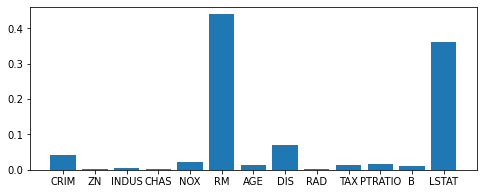

In [83]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from matplotlib import pyplot as plt
data = load_boston()
rf = RandomForestRegressor()
rf.fit(data.data, data.target);
print(rf.feature_importances_)

plt.figure(figsize=(8, 3))
plt.bar(range(1, 14), rf.feature_importances_)
_ = plt.xticks(range(1, 14), data.feature_names)

### Using Linear Model (LinearSVR)

In [87]:
data.data[:2], data.target[:2]

(array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
         6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
         1.5300e+01, 3.9690e+02, 4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
         6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
         1.7800e+01, 3.9690e+02, 9.1400e+00]]),
 array([24. , 21.6]))

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[-0.07688381  0.05293609 -0.02517436  0.35235135  0.18644799  4.56633777
  0.01111108 -0.75809134  0.22522111 -0.00699733 -0.228929    0.02761511
 -0.49620256]


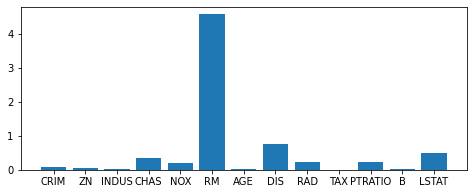

In [84]:
from sklearn.svm import LinearSVR
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVR().fit(data.data, data.target)
print(data.feature_names)
print(lsvc.coef_)
plt.figure(figsize=(8, 3))
plt.bar(range(data.data.shape[1]), np.abs(lsvc.coef_))
_ = plt.xticks(range(data.data.shape[1]), data.feature_names)

### Use Correlation

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[ 89.48611476  75.2576423  153.95488314  15.97151242 112.59148028
 471.84673988  83.47745922  33.57957033  85.91427767 141.76135658
 175.10554288  63.05422911 601.61787111]


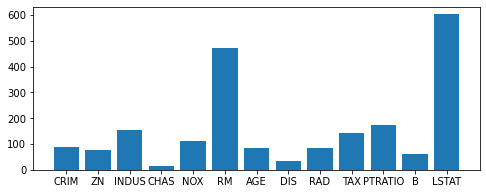

In [95]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from sklearn.feature_selection import f_regression
sel = SelectKBest(f_regression, k='all').fit(data.data, data.target)
sel.fit_transform(data.data, data.target)
print(data.feature_names)
print(sel.scores_)
plt.figure(figsize=(8, 3))
plt.bar(range(data.data.shape[1]), sel.scores_)
_ = plt.xticks(range(data.data.shape[1]), data.feature_names)
# plt.show()

## Sklearn Modeling

In [163]:
df_hr.head(2)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium


In [168]:
df_hr['salary'].value_counts()

low       7316
medium    6446
high      1237
nme          1
Name: salary, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
f_v=features.values
l_v=label.values
X_tt,X_validation,Y_tt,Y_validation=train_test_split(f_v,l_v,test_size=0.2)
X_train,X_test,Y_train,Y_test=train_test_split(X_tt,Y_tt,test_size=0.25)

from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.externals.six import StringIO
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
models=[]
models.append(("KNN",KNeighborsClassifier(n_neighbors=3)))
models.append(("GaussianNB",GaussianNB()))
models.append(("BernoulliNB",BernoulliNB()))
models.append(("DecisionTreeGini",DecisionTreeClassifier()))
models.append(("DecisionTreeEntropy",DecisionTreeClassifier(criterion="entropy")))
models.append(("SVM Classifier",SVC(C=1000)))
models.append(("OriginalRandomForest",RandomForestClassifier()))
models.append(("RandomForest",RandomForestClassifier(n_estimators=11,max_features=None)))
models.append(("Adaboost",AdaBoostClassifier(n_estimators=100)))
models.append(("LogisticRegression",LogisticRegression(C=1000,tol=1e-10,solver="sag",max_iter=10000)))
models.append(("GBDT",GradientBoostingClassifier(max_depth=6,n_estimators=100)))
for clf_name,clf in models:
    clf.fit(X_train,Y_train)
    xy_lst=[(X_train,Y_train),(X_validation,Y_validation),(X_test,Y_test)]
    for i in range(len(xy_lst)):
        X_part=xy_lst[i][0]
        Y_part=xy_lst[i][1]
        Y_pred=clf.predict(X_part)
        print(i)
        print(clf_name,"-ACC:",accuracy_score(Y_part,Y_pred))
        print(clf_name,"-REC:",recall_score(Y_part,Y_pred))
        print(clf_name,"-F1:",f1_score(Y_part,Y_pred))
        # dot_data=StringIO()
        # export_graphviz(clf,out_file=dot_data,
        #                          feature_names=f_names,
        #                          class_names=["NL","L"],
        #                          filled=True,
        #                          rounded=True,
        #                          special_characters=True)
        # graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
        # graph.write_pdf("dt_tree_2.pdf")

# Scipy

## Normal Distribution

In [123]:
import scipy
normal = scipy.stats.norm(0,1)
chi = scipy.stats.chi2

In [118]:
normal.pdf(0.0)

0.3989422804014327

In [119]:
normal.ppf(0.9)

1.2815515655446004

In [120]:
normal.cdf(2)

0.9772498680518208

In [122]:
normal.rvs(100).std()

0.989502255883895

# Time Series 时间序列

### Build dataset using Window 数据集构建

In [90]:
import pandas as pd
import tensorflow as tf
import numpy as np
import warnings
warnings.simplefilter('ignore')

df_train = pd.read_csv('tianyan_train.csv')
print('before selection:',df_train.columns)
feature_columns = ['x'+str(i) for i in range(1,47)]
df_train = df_train.loc[:,feature_columns]
df_test = pd.read_csv('tianyan_test.csv')
windows_length = 5
dataset = tf.data.Dataset.from_tensor_slices(df_train)
dataset = dataset.window(windows_length, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(windows_length))
dataset = dataset.map(lambda window: (window[:,:]))

before selection: Index(['Unnamed: 0', 'Num', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8',
       'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18',
       'x19', 'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28',
       'x29', 'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38',
       'x39', 'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'Vol',
       'tradeTime', 'MidPrice', 'date'],
      dtype='object')


#### tf.dataset to numpy array

In [18]:
train_dataset = np.stack(dataset.map(lambda window: (window[:,:])).as_numpy_iterator())
train_dataset.shape

(23396, 5, 46)

### Dealing With Time Stamp 时间戳

In [28]:
df_test['timestamp'] = df_test['date'].astype(str) + " " + df_test['tradeTime'].astype(str)
df_test['timestamp'].head(3)

0    20200601 93003
1    20200601 93006
2    20200601 93009
Name: timestamp, dtype: object

#### Parse TimeStamp

In [38]:
from datetime import datetime
def parseTimestamp(time_string):
    from datetime import datetime
    return datetime. strptime(time_string, '%Y%m%d %H%M%S')

In [42]:
parseTimestamp(df_test['timestamp'][0])

datetime.datetime(2020, 6, 1, 9, 30, 3)

In [43]:
df_test['timestamp'] = df_test['timestamp'].apply(parseTimestamp)

In [44]:
df_test['timestamp'].head(3)

0   2020-06-01 09:30:03
1   2020-06-01 09:30:06
2   2020-06-01 09:30:09
Name: timestamp, dtype: datetime64[ns]

In [47]:
df_test.set_index('timestamp', inplace=True)

In [51]:
#可以用时间进行截取了
df_test.loc['2020-06-01':'2020-06-10'].head(1)

,Unnamed: 0,Num,x1,x2,x3,x4,x5,x6,x7,x8,...,x41,x42,x43,x44,x45,x46,Vol,tradeTime,MidPrice,date
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-01 09:30:03,1,2,-0.755578,-1,1.010572,0.378437,-1.221391,-0.831798,0.298105,0.297316,...,-1.104833,-0.730426,1.328756,0.730292,1.191762,0,0,93003,112.72,20200601


#### resample

In [57]:
df_test.resample('T').mean().head(2)

,Unnamed: 0,Num,x1,x2,x3,x4,x5,x6,x7,x8,...,x41,x42,x43,x44,x45,x46,Vol,tradeTime,MidPrice,date
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-01 09:30:00,10.0,2.0,0.342302,0.368421,0.228258,0.069032,-0.144532,-0.043779,0.018273,0.067807,...,-0.021643,-0.691394,1.390857,0.934847,0.860820,0.052632,1.526316,93030.0,112.559211,20200601.0
2020-06-01 09:31:00,29.5,2.0,0.117935,0.100000,-0.078208,0.181388,-0.005388,-0.351178,0.141960,0.032673,...,0.143172,-0.683413,1.386662,0.967664,0.824754,0.000000,0.000000,93128.5,112.539750,20200601.0


### Compute log_return (assign)

In [61]:
df_test_target = df_test.assign(logret=np.log(df_test.MidPrice).groupby(df_test.date).diff(-20))
df_test_target.head(2)

,Unnamed: 0,Num,x1,x2,x3,x4,x5,x6,x7,x8,...,x42,x43,x44,x45,x46,Vol,tradeTime,MidPrice,date,logret
timestamp,,,,,,,,,,,,,,,,,,,,,
2020-06-01 09:30:03,1,2,-0.755578,-1,1.010572,0.378437,-1.221391,-0.831798,0.298105,0.297316,...,-0.730426,1.328756,0.730292,1.191762,0,0,93003,112.720,20200601,0.001598
2020-06-01 09:30:06,2,2,1.037052,1,0.715161,0.131032,-1.721667,0.000000,-0.280999,-0.369551,...,-0.724367,1.346770,0.797311,1.122751,0,0,93006,112.725,20200601,0.001643


In [67]:
np.log(df_test.MidPrice).groupby(df_test.date).diff(-20).head(3)

timestamp
2020-06-01 09:30:03    0.001598
2020-06-01 09:30:06    0.001643
2020-06-01 09:30:09    0.000000
Name: MidPrice, dtype: float64

### Seasonality and Trend

### Some Models
1. Arima
2. Prophet
3. Neural Prophet
4. Vector Autoregression (VAR)